<a href="https://colab.research.google.com/github/Manusua/03MIA_Algoritmos_de_Optimizacion/blob/main/Retos/Algoritmos_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 1

Nombre: Manuel Suárez Román <br>
[Enlace a Github](https://github.com/Manusua/03MIA_Algoritmos_de_Optimizacion)<br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [6]:
# Torres de Hanoi
def hanoi_dv(num_fichas, origen, destino, auxiliar):
    if num_fichas == 1:
        print("Ficha: ", origen, "-->", destino)
    else:
        hanoi_dv(num_fichas-1, origen, auxiliar, destino)
        print("Ficha: ", origen, "-->", destino)
        hanoi_dv(num_fichas-1, auxiliar, destino, origen)

In [7]:
# Prueba 1
num_fichas = 3
hanoi_dv(num_fichas, 'A', 'C', 'B')

Ficha:  A --> C
Ficha:  A --> B
Ficha:  C --> B
Ficha:  A --> C
Ficha:  B --> A
Ficha:  B --> C
Ficha:  A --> C


In [8]:
# Prueba 2
num_fichas = 5
hanoi_dv(num_fichas, 'A', 'C', 'B')

Ficha:  A --> C
Ficha:  A --> B
Ficha:  C --> B
Ficha:  A --> C
Ficha:  B --> A
Ficha:  B --> C
Ficha:  A --> C
Ficha:  A --> B
Ficha:  C --> B
Ficha:  C --> A
Ficha:  B --> A
Ficha:  C --> B
Ficha:  A --> C
Ficha:  A --> B
Ficha:  C --> B
Ficha:  A --> C
Ficha:  B --> A
Ficha:  B --> C
Ficha:  A --> C
Ficha:  B --> A
Ficha:  C --> B
Ficha:  C --> A
Ficha:  B --> A
Ficha:  B --> C
Ficha:  A --> C
Ficha:  A --> B
Ficha:  C --> B
Ficha:  A --> C
Ficha:  B --> A
Ficha:  B --> C
Ficha:  A --> C


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [10]:
import time
import matplotlib.pyplot as plt


In [11]:
#Sucesión_de_Fibonacci_Recursiva

def fibonacci_rec(n):
    if n <= 1:
        return n
    else:
        return fibonacci_rec(n-1) + fibonacci_rec(n-2)


In [12]:
#Sucesión_de_Fibonacci_Iterativa

def fibonacci_iter(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for i in range(n-1):
        a, b = b, a + b
    return b

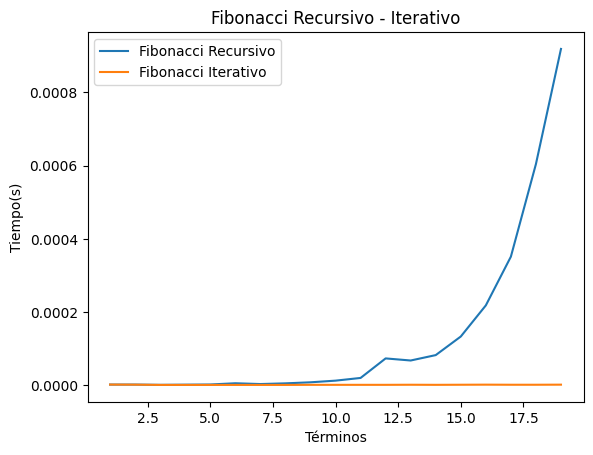

In [16]:
num_terminos = 20
arr_terminos = range(1, num_terminos)

# Tiempo en el algoritmo recursivo
arr_t_rec = []
for term in arr_terminos:
  start_time = time.time()
  resultado = fibonacci_rec(term)
  end_time = time.time()
  arr_t_rec.append(end_time - start_time)

# Tiempo en el algoritmo iterativo
arr_t_iter = []
for term in arr_terminos:
  start_time = time.time()
  resultado = fibonacci_iter(term)
  end_time = time.time()
  arr_t_iter.append(end_time - start_time)

plt.plot(arr_terminos, arr_t_rec, label='Fibonacci Recursivo')
plt.plot(arr_terminos, arr_t_iter, label='Fibonacci Iterativo')
plt.xlabel('Términos')
plt.ylabel('Tiempo(s)')
plt.title('Fibonacci Recursivo - Iterativo')
plt.legend()
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [17]:
# Problema del cambio de moneda

def cambio_de_monedas(total, monedas):
    monedas.sort(reverse=True)  # Ordenar las denominaciones de mayor a menor valor
    cambio = []
    for denominacion in monedas:
        while total >= denominacion:
            cambio.append(denominacion)
            total -= denominacion
    return cambio

In [18]:
# Prueba 1
total = 138
monedas = [1, 2, 5, 10, 20, 50, 100]
cambio = cambio_de_monedas(total, monedas)
print("El cambio para ", total, "cts. es:", cambio)

El cambio para  138 cts. es: [100, 20, 10, 5, 2, 1]


In [20]:
# Prueba 2
total = 1317
monedas = [1, 2, 5, 10, 20, 50, 100]
cambio = cambio_de_monedas(total, monedas)
print("El cambio para ", total, "cts. es:", cambio)

El cambio para  1317 cts. es: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10, 5, 2]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [21]:
# Problema de las N-Reinas

def es_seguro(tablero, fila, col, num_filas):
    # Misma columna
    for i in range(fila):
        if tablero[i][col] == 1:
            return False

    # Ddiagonal superior izquierda
    i, j = fila, col
    while i >= 0 and j >= 0:
        if tablero[i][j] == 1:
            return False
        i -= 1
        j -= 1

    # Diagonal superior derecha
    i, j = fila, col
    while i >= 0 and j < num_filas:
        if tablero[i][j] == 1:
            return False
        i -= 1
        j += 1
    # YA sabemos que en la misma fila no va a estar por construccion del problema
    return True

def n_reinas_vuelta_atras(tablero, fila, num_reinas, sols):

    if fila == num_reinas:
        # Ya tenemos todas las reinas colocadas
        sols.append([fila[:] for fila in tablero])
        return

    for col in range(num_reinas):
        if es_seguro(tablero, fila, col, num_reinas):
            tablero[fila][col] = 1
            n_reinas_vuelta_atras(tablero, fila + 1, num_reinas, sols)
            tablero[fila][col] = 0

def n_reinas(num_reinas):
    tablero = [[0] * num_reinas for i in range(num_reinas)]
    sols = []
    n_reinas_vuelta_atras(tablero, 0, num_reinas, sols)
    return sols





In [29]:
#Prueba 1
num_reinas = 4
sols = n_reinas(num_reinas)
print("Hay ", str(len(sols)), " soluciones para el problema con ", str(num_reinas), "reinas:")
for sol in sols:
    for fila in sol:
        print(' '.join(['Q' if c == 1 else '*' for c in fila]))
    print("-------")

Hay  2  soluciones para el problema con  4 reinas:
* Q * *
* * * Q
Q * * *
* * Q *
-------
* * Q *
Q * * *
* * * Q
* Q * *
-------


In [31]:
#Prueba 2
num_reinas = 7
sols = n_reinas(num_reinas)
print("Hay ", str(len(sols)), " soluciones para el problema con ", str(num_reinas), "reinas:")
for sol in sols:
    for fila in sol:
        print(' '.join(['Q' if c == 1 else '*' for c in fila]))
    print("----------")

Hay  40  soluciones para el problema con  7 reinas:
Q * * * * * *
* * Q * * * *
* * * * Q * *
* * * * * * Q
* Q * * * * *
* * * Q * * *
* * * * * Q *
----------
Q * * * * * *
* * * Q * * *
* * * * * * Q
* * Q * * * *
* * * * * Q *
* Q * * * * *
* * * * Q * *
----------
Q * * * * * *
* * * * Q * *
* Q * * * * *
* * * * * Q *
* * Q * * * *
* * * * * * Q
* * * Q * * *
----------
Q * * * * * *
* * * * * Q *
* * * Q * * *
* Q * * * * *
* * * * * * Q
* * * * Q * *
* * Q * * * *
----------
* Q * * * * *
* * * Q * * *
Q * * * * * *
* * * * * * Q
* * * * Q * *
* * Q * * * *
* * * * * Q *
----------
* Q * * * * *
* * * Q * * *
* * * * * Q *
Q * * * * * *
* * Q * * * *
* * * * Q * *
* * * * * * Q
----------
* Q * * * * *
* * * * Q * *
Q * * * * * *
* * * Q * * *
* * * * * * Q
* * Q * * * *
* * * * * Q *
----------
* Q * * * * *
* * * * Q * *
* * Q * * * *
Q * * * * * *
* * * * * * Q
* * * Q * * *
* * * * * Q *
----------
* Q * * * * *
* * * * Q * *
* * * * * * Q
* * * Q * * *
Q * * * * * *
* * Q 

In [32]:
%%shell
jupyter nbconvert --to html Algoritmos_R1.ipynb

[NbConvertApp] Converting notebook Algoritmos_R1.ipynb to html
[NbConvertApp] Writing 652314 bytes to Algoritmos_R1.html
